<a href="https://colab.research.google.com/github/yuuaki1/ML-NoteBooks/blob/main/SVM_Kernel_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
%matplotlib inline

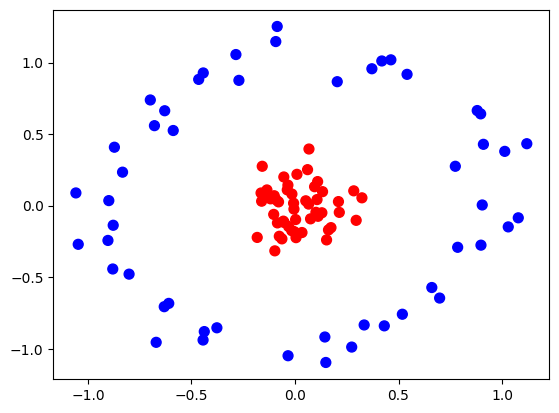

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, noise=0.1, factor=0.1)

plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.25

In [13]:
zero_one_colormap = ListedColormap(('blue', 'red'))

%matplotlib inline

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                              X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colormap)

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colormap)(i), label = j)

  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

<ipython-input-13-fb3ebbf0d7f4>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


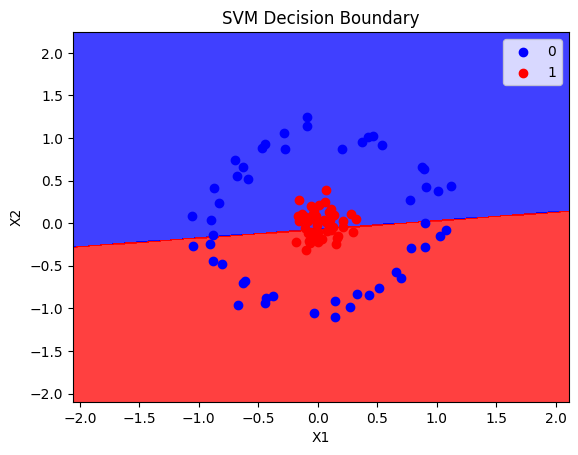

In [15]:
plot_decision_boundary(X, y, classifier)